# Week 1
---

# Problem statement :

In the realm of E-Commerce, demand forecasting plays a pivotal role in ensuring business
success. This project aims to develop a demand forecasting model in an E-commerce business
that predicts future product demand leveraging time series analysis and multivariate regression
based on historical sales data, along with Google Analytics KPIs such as Google clicks and
Facebook impressions, which are valuable indicators of customer interest.


# Merging the given Datasets
---
1. Data Loading and Preparation: The code begins by importing the necessary libraries. Three Excel files are then read into separate pandas DataFrames (df_quantity, df_google_clicks, and df_fb_impressions). The columns are renamed in the df_google_clicks and df_fb_impressions DataFrames to avoid naming conflicts and ensure clarity.

2. Data Merging: The three DataFrames are merged into a single master dataset (master_dataset) using the "Day Index" column as the key. The merging is performed with a left join to retain all values from the df_quantity DataFrame, while adding matching data from df_google_clicks and df_fb_impressions. This ensures that the combined dataset includes all relevant data across the three sources.

3. Visualization: A boxplot is created to visualize the distribution of the numerical columns (Quantity, Google Clicks, and FB Impressions) in the merged dataset. The plot provides a graphical summary of the statistical distribution, highlighting key statistics such as median, quartiles, and outliers for each variable.

,Day Index,Quantity,Google Clicks,FB Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678
...,...,...,...,...
207,2022-06-26,13,114,1218
208,2022-06-27,16,106,1311
209,2022-06-28,13,109,885
210,2022-06-29,16,60,1000


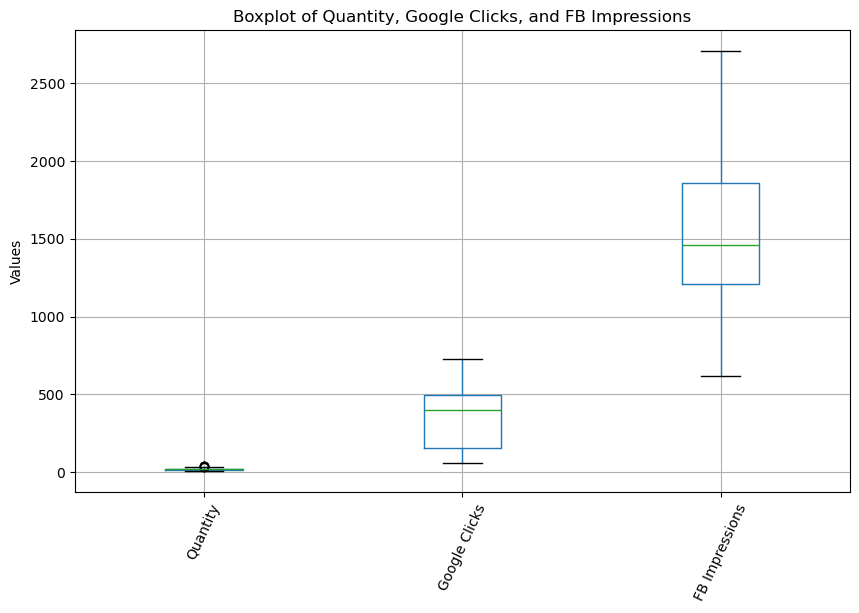

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

# File paths for the three Excel files
data_file_path = r"C:\Users\pm5cd\Downloads\ProductA.xlsx"
data_file_path1 = r"C:\Users\pm5cd\Downloads\ProductA_google_clicks.xlsx"
data_file_path2 = r"C:\Users\pm5cd\Downloads\ProductA_fb_impressions.xlsx"

# Read each Excel file separately
df_quantity = pd.read_excel(data_file_path)
df_google_clicks = pd.read_excel(data_file_path1)
df_fb_impressions = pd.read_excel(data_file_path2)

# Rename columns to avoid conflicts and for clarity
df_google_clicks = df_google_clicks.rename(columns={'Clicks': 'Google Clicks'})
df_fb_impressions = df_fb_impressions.rename(columns={'Impressions': 'FB Impressions'})

# Merge DataFrames on "Day Index" using outer joins to retain all Day Index values from df_quantity
master_dataset = df_quantity.merge(df_google_clicks, on="Day Index", how="left") \
                            .merge(df_fb_impressions, on="Day Index", how="left")

# Display the merged dataset
display(master_dataset)

# Create a boxplot for each numerical column in the merged dataset
plt.figure(figsize=(10, 6))
master_dataset.boxplot(column=['Quantity', 'Google Clicks', 'FB Impressions'])
plt.title("Boxplot of Quantity, Google Clicks, and FB Impressions")
plt.ylabel("Values")
plt.xticks(rotation=65)
plt.show()



---
# Week 2


---
# Handling Missing values & Handle Outliers :-
---
1. Handling Missing Values in Numerical Columns: The code uses the fillna() function with the mean() method to fill missing values in numerical columns. By using df.mean(), any missing data in numerical columns will be replaced with the column's mean value, which is commonly used when there is no specific context suggesting another value for replacement.
2. Handling Missing Values in Categorical Columns: For categorical columns (detected by df.select_dtypes(include=['object'])), the code replaces missing values with the most frequently occurring value, or "mode," of each column. This ensures that categorical data remains within known categories and avoids introducing new or arbitrary values.
3. Removing Outliers in Numerical Data: A function called remove_outliers() is defined to remove outliers using the Interquartile Range (IQR) method. For each numerical column specified, it calculates the first quartile (Q1) and third quartile (Q3) values, computes the IQR (difference between Q3 and Q1), and removes values that fall outside 1.5 times the IQR from Q1 and Q3. This approach effectively removes extreme values that could distort analysis without eliminating regular variations.
4. Applying Outlier Removal and Saving the Cleaned Dataset: The remove_outliers() function is applied to all numerical columns in the dataset. After outliers and missing values are handled, the cleaned dataset is saved as a new Excel file, preserving the original dataset and providing a prepared version for further analysis.

In [37]:
import pandas as pd

# Load the dataset from your Excel file
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\master_dataset.xlsx'
df = pd.read_excel(file_path)

# Step 1: Inspect the Data
print("Initial Data Info:")
print(df.info())
print("\nSummary of Numerical Data:")
print(df.describe())

# Step 2: Handle Missing Values
# Option 1: Imputation - Fill missing values with mean/median/mode (example uses mean for numerical columns)
df.fillna(df.mean(), inplace=True)  # For numerical columns
# For categorical columns, fill with mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Step 3: Handle Outliers
# Define a function to remove outliers based on Z-score or IQR
def remove_outliers(df, columns):
    for column in columns:
        if df[column].dtype in ['float64', 'int64']:  # Apply only on numerical columns
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            # Filter out rows with values outside of 1.5*IQR range
            df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return df

# Apply the outlier removal on relevant columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = remove_outliers(df, numerical_columns)

# Step 4: Save Cleaned Data
output_file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\cleaned_master_dataset.xlsx'
df.to_excel(output_file_path, index=False)


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Day Index       212 non-null    datetime64[ns]
 1   Quantity        212 non-null    int64         
 2   Google Clicks   212 non-null    int64         
 3   FB Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB
None

Summary of Numerical Data:
                 Day Index    Quantity  Google Clicks  FB Impressions
count                  212  212.000000      212.00000      212.000000
mean   2022-03-16 12:00:00   17.542453      358.20283     1531.702830
min    2021-12-01 00:00:00    5.000000       60.00000      620.000000
25%    2022-01-22 18:00:00   13.750000      154.00000     1209.750000
50%    2022-03-16 12:00:00   17.000000      402.50000     1460.000000
75%    2022-05-08 06:00:00   21.000000      492.75000  

---
# Plotting of independent variables

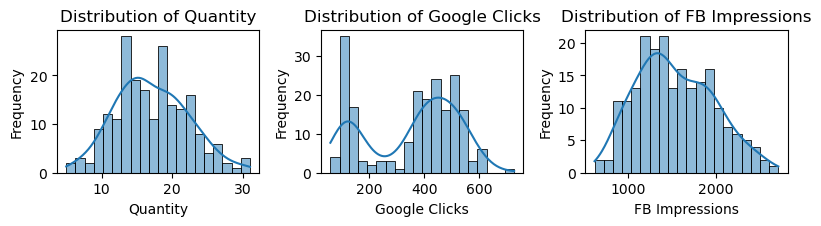

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset from your saved Excel file
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\cleaned_master_dataset.xlsx'
df_cleaned = pd.read_excel(file_path)

# Step 1: Inspect numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Plot Distribution Plots for Independent Variables (Numerical Columns)
plt.figure(figsize=(16, 12))  # Set the size of the figure

# Loop through the numerical columns and plot a distribution plot for each
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 6, i)  # Arrange plots in a grid of 3x3 (adjust size for your dataset)
    sns.histplot(df_cleaned[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

---
# Visualizations to understand trends and seasonality :-

Column Names: Index(['Day Index', 'Quantity', 'Google Clicks', 'FB Impressions'], dtype='object')


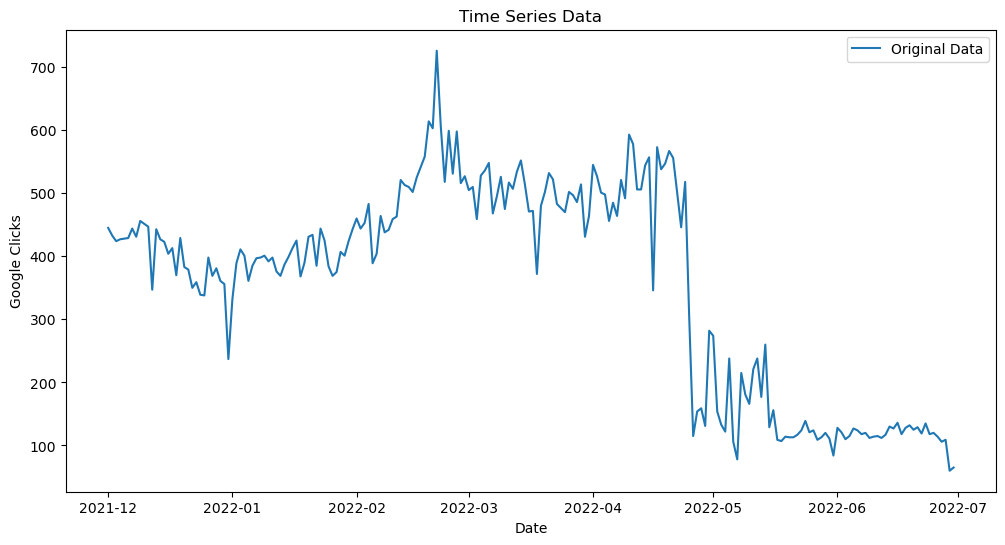

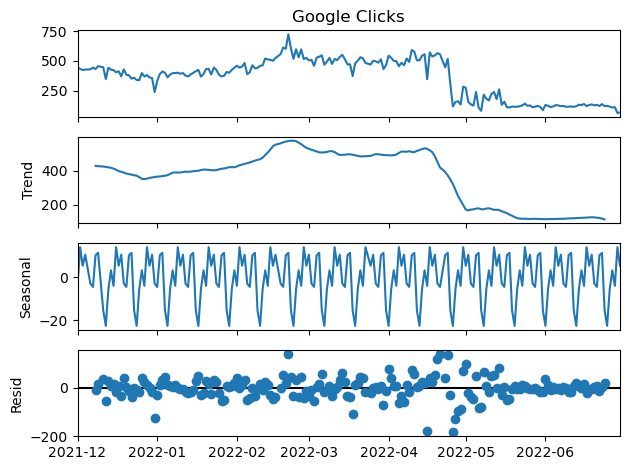

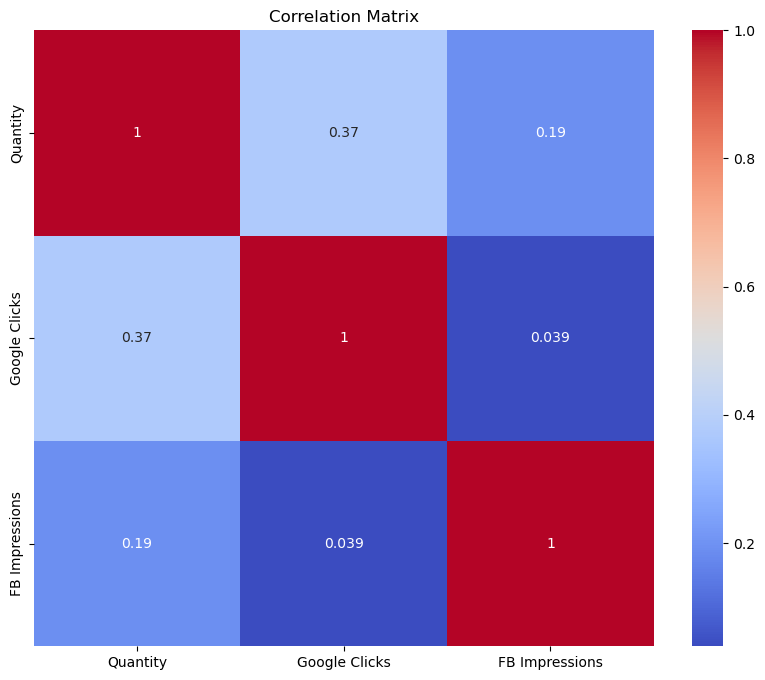

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset.xlsx'
df = pd.read_excel(file_path)

# Check the column names to ensure 'Date' and 'Value' columns are present
print("Column Names:", df.columns)

# Update the column names if they are different
date_column = 'Day Index'  # Change if the date column has a different name
value_column = 'Google Clicks'  # Change if the value column has a different name

# Convert 'Date' column to datetime
if date_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column])
    df.set_index(date_column, inplace=True)
else:
    raise KeyError(f"'{date_column}' column not found in dataset.")

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df[value_column], label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel(value_column)
plt.legend()
plt.show()

# Seasonal Decomposition for Trend and Seasonality
decomposition = seasonal_decompose(df[value_column], model='additive', period=12)  # Adjust period as needed
decomposition.plot()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

---
# Sales Monthly data

A copy of the DataFrame is made to prevent altering the original data, and Day Index is set as the index. The dataset is then resampled to monthly frequency, and the data is summed for each month. This resampled monthly data is displayed, providing a view of metrics aggregated on a monthly basis.

In [19]:
import pandas as pd

# Load the dataset from your Excel file
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\master_dataset.xlsx'
df = pd.read_excel(file_path)

# Display column names to confirm the correct date column name
print("Column names in the dataset:", df.columns)

# Convert the 'Day Index' column to datetime format
df['Day Index'] = pd.to_datetime(df['Day Index'], errors='coerce')

# Verify conversion by displaying the first few rows of 'Day Index'
print("\nFirst few entries in 'Day Index' after conversion:")
print(df['Day Index'].head())

# Check for any NaT values
num_unconvertible_dates = df['Day Index'].isnull().sum()
if num_unconvertible_dates > 0:
    print(f"\nThere are {num_unconvertible_dates} unconvertible dates in the 'Day Index' column.")
else:
    print("\nAll entries in 'Day Index' converted successfully.")

# Create a copy of the data to avoid modifying the original DataFrame
df_resampled = df.copy()

# Set the 'Day Index' column as the index in the copy
df_resampled.set_index('Day Index', inplace=True)

# Resample data to a monthly frequency (using 'ME' for month-end) and calculate sums for each month
df_monthly = df_resampled.resample('ME').sum()  # 'ME' for month-end, 'W' for week, 'D' for day

# Display the resampled monthly data
print("\nResampled Monthly Data (Summed for Each Month):")
print(df_monthly)


Column names in the dataset: Index(['Day Index', 'Quantity', 'Google Clicks', 'FB Impressions'], dtype='object')

First few entries in 'Day Index' after conversion:
0   2021-12-01
1   2021-12-02
2   2021-12-03
3   2021-12-04
4   2021-12-05
Name: Day Index, dtype: datetime64[ns]

All entries in 'Day Index' converted successfully.

Resampled Monthly Data (Summed for Each Month):
            Quantity  Google Clicks  FB Impressions
Day Index                                          
2021-12-31       495          12284           35887
2022-01-31       533          12314           47464
2022-02-28       554          14372           42042
2022-03-31       620          15419           50803
2022-04-30       599          13480           52857
2022-05-31       471           4566           47325
2022-06-30       447           3504           48343


---
# Feature Engineering(Getting the dataset with the week,months data)

1. At first I am inserting the weekend column where it checks whether it is a weekend or not
2. Then, I am inserting all the days present in a week and it gives 1 whether the date belongs to particular date or else represented with 0.
3. After the above steps, i am inserting all the months and as same as above it gives 1 if it is of that particular month otherwise  it will be denoted by 0. 

In [3]:
import pandas as pd
import os

# Define the file path to your dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset.xlsx'

# Check if the input file exists
if not os.path.exists(file_path):
    print(f"Error: The file at {file_path} was not found. Please check the path.")
else:
    # Load the dataset
    df = pd.read_excel(file_path)

    # Convert 'Day Index' to datetime format
    df['Day Index'] = pd.to_datetime(df['Day Index'], errors='coerce')

    # Create 'Weekend' column
    df['Weekend'] = df['Day Index'].dt.weekday.isin([5, 6]).astype(int)

    # Create columns for each day of the week
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        df[day] = (df['Day Index'].dt.day_name() == day).astype(int)

    # Create columns for each month by name (e.g., 'January', 'February', etc.)
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    for month_num, month_name in enumerate(month_names, start=1):
        df[month_name] = (df['Day Index'].dt.month == month_num).astype(int)

    # Display the entire DataFrame 
    display(df)






,Day Index,Quantity,Google Clicks,FB Impressions,Weekend,Monday,Tuesday,Wednesday,Thursday,Friday,...,March,April,May,June,July,August,September,October,November,December
0,2021-12-01,14,445,620,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2021-12-02,10,433,890,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2021-12-03,13,424,851,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2021-12-04,22,427,881,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021-12-06,12,429,995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2022-06-26,13,114,1218,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
203,2022-06-27,16,106,1311,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
204,2022-06-28,13,109,885,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
205,2022-06-29,16,60,1000,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


---
# Displaying the graphs for the monthly sales, weekday sales, weekend sales

1.Data Preparation: The dataset is loaded,with DayIndex converted to datetime format and a Weekend indicator added. This enables time-based analysis and comparisons between weekdays and weekends.

2.Monthly Sales Analysis: A bar plot shows monthly sales, helping identify high and low sales months. Seasonal trends are visible, aiding in planning and inventory management.

3.Weekend vs. Weekday Sales: Sales are grouped by day type, showing total sales for weekends and weekdays. This insight reveals whether customer engagement is stronger on weekends, which can guide marketing strategies.

4.Weekly Sales Patterns: A bar plot displays sales for each weekday, revealing specific high-activity days. This helps optimize scheduling for promotions and inventory restocking.

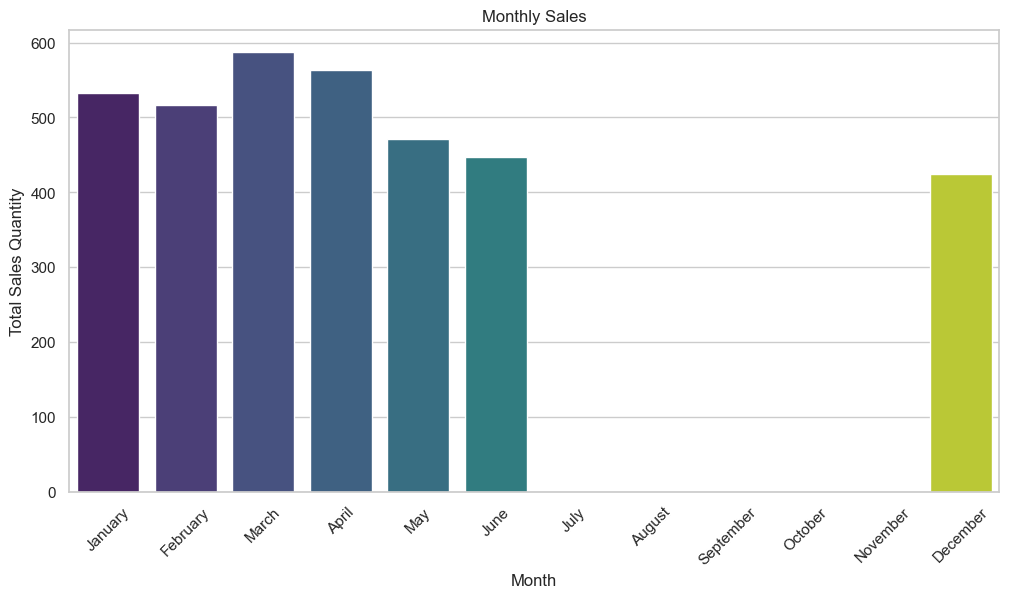

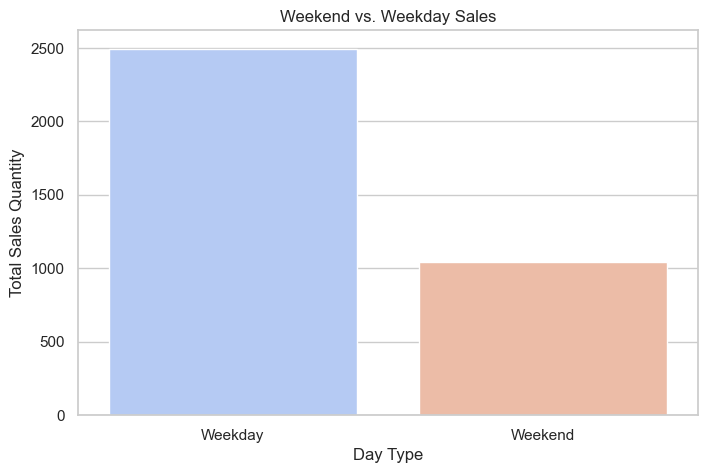

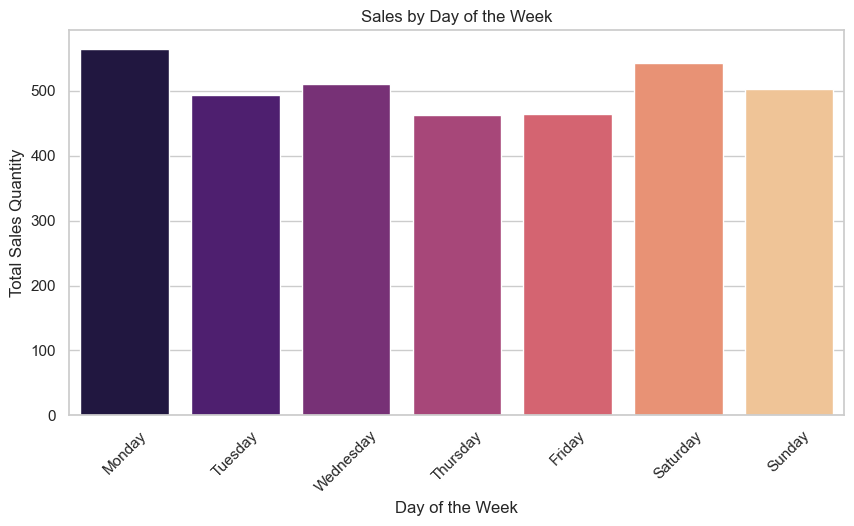

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

# Define the file path and check if it exists
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'

if not os.path.exists(file_path):
    print(f"Error: The file at {file_path} was not found. Please check the path.")
else:
    # Load the dataset
    df = pd.read_excel(file_path)

    # Ensure 'Day Index' is in datetime format
    df['Day Index'] = pd.to_datetime(df['Day Index'], errors='coerce')

    # Monthly Sales Plot
    monthly_sales = df.groupby(df['Day Index'].dt.month_name())['Quantity'].sum().reindex(
        ["January", "February", "March", "April", "May", "June", 
         "July", "August", "September", "October", "November", "December"]
    )

    plt.figure(figsize=(12, 6))
    sns.barplot(x=monthly_sales.index, y=monthly_sales.values, hue=monthly_sales.index, 
                dodge=False, palette="viridis", legend=False)
    plt.title("Monthly Sales")
    plt.xlabel("Month")
    plt.ylabel("Total Sales Quantity")
    plt.xticks(rotation=45)
    plt.show()

    # Weekend vs. Weekday Sales Plot
    df['Is_Weekend'] = df['Weekend'] == 1
    weekend_weekday_sales = df.groupby('Is_Weekend')['Quantity'].sum()
    weekend_weekday_sales.index = ['Weekday', 'Weekend']

    plt.figure(figsize=(8, 5))
    sns.barplot(x=weekend_weekday_sales.index, y=weekend_weekday_sales.values, 
                hue=weekend_weekday_sales.index, dodge=False, palette="coolwarm", legend=False)
    plt.title("Weekend vs. Weekday Sales")
    plt.xlabel("Day Type")
    plt.ylabel("Total Sales Quantity")
    plt.show()

    # Weekday Sales Plot
    weekday_sales = df.groupby(df['Day Index'].dt.day_name())['Quantity'].sum().reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )

    plt.figure(figsize=(10, 5))
    sns.barplot(x=weekday_sales.index, y=weekday_sales.values, 
                hue=weekday_sales.index, dodge=False, palette="magma", legend=False)
    plt.title("Sales by Day of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Total Sales Quantity")
    plt.xticks(rotation=45)
    plt.show()





---
# Sales Divison :

1. Data Loading and Date Conversion: The code loads the dataset, ensures the Day Index column is in datetime format, and verifies the file path, handling any missing file errors gracefully.

 2. Sales Analysis: The code calculates and prints total sales on weekends and weekdays by filtering based on the Weekend column. It also calculates monthly sales by grouping on the month name, showing the distribution of sales throughout the year.

In [41]:
import pandas as pd
import os

# Define the file path and load the dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'

if not os.path.exists(file_path):
    print(f"Error: The file at {file_path} was not found. Please check the path.")
else:
    # Load the dataset
    df = pd.read_excel(file_path)

    # Ensure 'Day Index' is in datetime format
    df['Day Index'] = pd.to_datetime(df['Day Index'], errors='coerce')

    # Sales on Weekends
    weekend_sales = df[df['Weekend'] == 1]['Quantity'].sum()
    print(f"Total Sales on Weekends: {weekend_sales}")

    # Sales on Weekdays
    weekday_sales = df[df['Weekend'] == 0]['Quantity'].sum()
    print(f"Total Sales on Weekdays: {weekday_sales}")

    # Monthly Sales
    monthly_sales = df.groupby(df['Day Index'].dt.month_name())['Quantity'].sum().reindex(
        ["January", "February", "March", "April", "May", "June", 
         "July", "August", "September", "October", "November", "December"]
    )
    print("\nMonthly Sales:")
    print(monthly_sales)

Total Sales on Weekends: 1046
Total Sales on Weekdays: 2496

Monthly Sales:
Day Index
January      533.0
February     516.0
March        588.0
April        563.0
May          471.0
June         447.0
July           NaN
August         NaN
September      NaN
October        NaN
November       NaN
December     424.0
Name: Quantity, dtype: float64


---
# Graph's for before and after outlier detection :

1. Initial Sales Plot: A time series plot shows Quantity sales over time before outlier removal, highlighting the presence of any extreme values.

2. Outlier Detection and Removal: Outliers in Quantity are identified using the Interquartile Range (IQR) method, defining any data points outside 1.5 times the IQR from the lower and upper bounds as outliers.

3. Cleaned Sales Plot: Another time series plot displays sales after removing outliers, providing a clearer view of typical sales trends without extreme values.

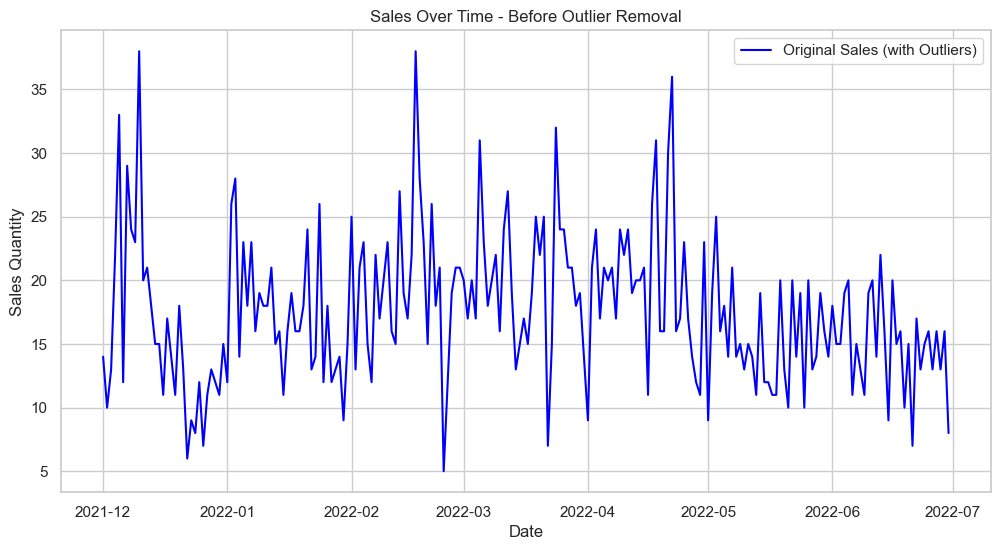

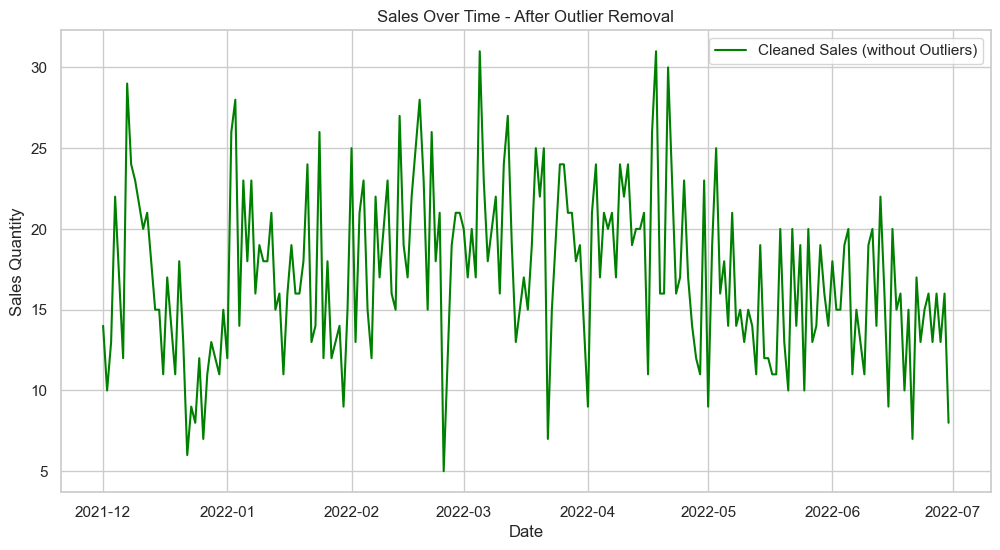

In [38]:
# Let's load the newly uploaded dataset, perform outlier detection, and generate the requested time series plots.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the new dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\master_dataset.xlsx'
df = pd.read_excel(file_path)

# Convert 'Day Index' to datetime format and set as index
df['Day Index'] = pd.to_datetime(df['Day Index'], errors='coerce')
df = df.set_index('Day Index').sort_index()

# Plot Sales over Time Before Outlier Removal
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Quantity'], label="Original Sales (with Outliers)", color='blue')
plt.title("Sales Over Time - Before Outlier Removal")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.legend()
plt.show()

# Detect and Remove Outliers using IQR
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

# Plot Sales over Time After Outlier Removal
plt.figure(figsize=(12, 6))
plt.plot(df_no_outliers.index, df_no_outliers['Quantity'], label="Cleaned Sales (without Outliers)", color='green')
plt.title("Sales Over Time - After Outlier Removal")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.legend()
plt.show()

---
# corelation heatmap :
                        It is a graphical representation used to visualize the strength and direction of relationships between multiple variables in a dataset.

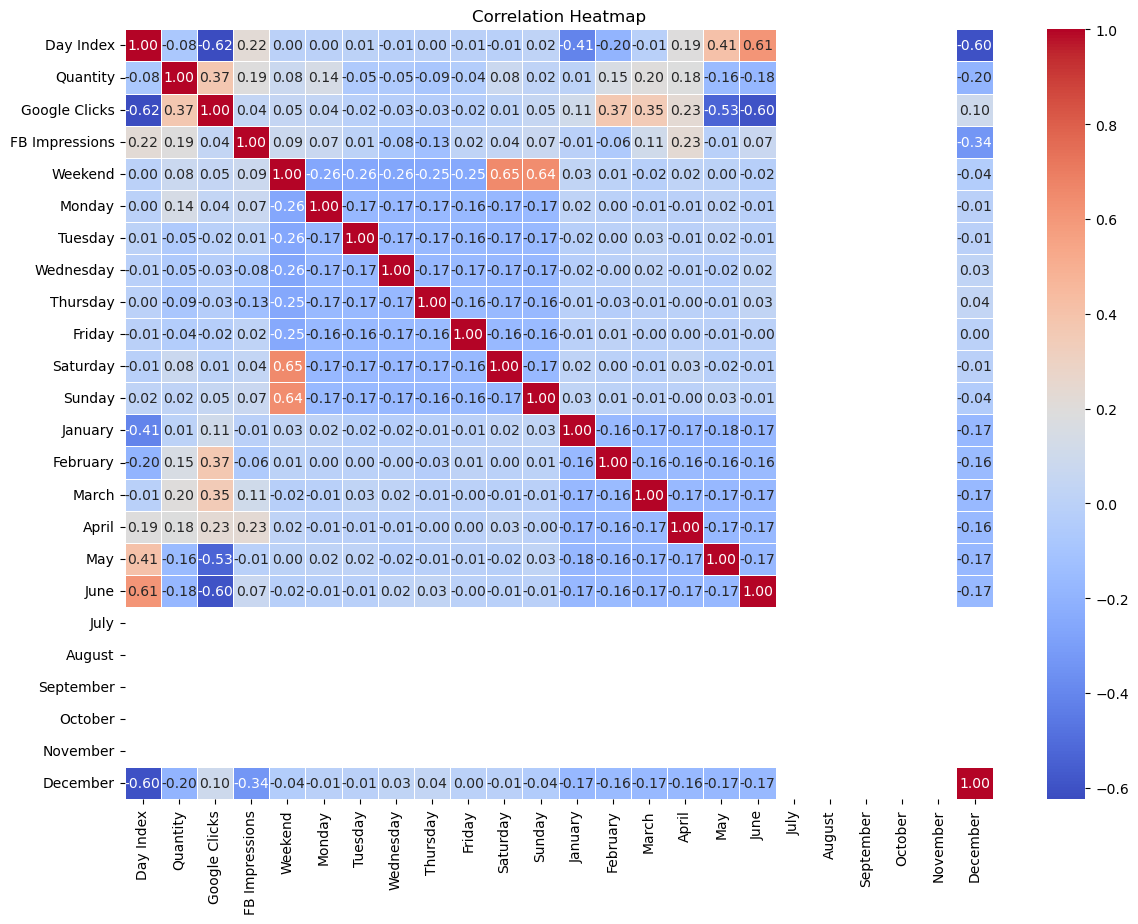

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset_updated.xlsx'

df = pd.read_excel(file_path)

# Ensure 'Day Index' is in datetime format
df['Day Index'] = pd.to_datetime(df['Day Index'], errors='coerce')

# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


---
# Statistical Summary

Additional Statistics:

1. Mean: df.mean() calculates the mean for each numerical column.
2. Median: df.median() calculates the median for each numerical column, which helps understand the data's central tendency.
3. Standard Deviation: df.std(numeric_only=True) calculates the standard deviation, indicating the amount of variation or dispersion of the dataset's numerical columns.
4. Variance: df.var() computes the variance of each numerical column, showing how widely data points differ from the mean.
Each statistic is printed, providing detailed insights into each numerical column’s distribution characteristics.
5. Summary of Categorical Columns:
                                    For each categorical column, df[col].value_counts() shows the count of each unique value, giving an overview of the distribution for categorical data. This can help identify dominant categories or understand the spread across categories.
6. Correlation Matrix:
                        df.corr() computes the correlation matrix for numerical columns. This matrix shows the strength and direction of relationships between pairs of numerical columns (values range from -1 to 1). A positive value suggests a positive relationship, while a negative value indicates an inverse relationship.

In [10]:
import pandas as pd

# Provide the path to your Excel file
file_path = r'C:\Users\pm5cd\Documents\FutureCart Project\Week 2\cleaned_master_dataset.xlsx'
df = pd.read_excel(file_path)
# Get summary statistics for numerical columns
summary_stats = df.describe()
print("Basic Statistical Summary:")
print(summary_stats)
# Mean of each numerical column
mean_values = df.mean(numeric_only=True)
print("\nMean of each column:\n", mean_values)

# Median of each numerical column
median_values = df.median(numeric_only=True)
print("\nMedian of each column:\n", median_values)

# Standard deviation of each numerical column
std_dev = df.std(numeric_only=True)
print("\nStandard Deviation of each column:\n", std_dev)

# Variance of each numerical column
variance = df.var(numeric_only=True)
print("\nVariance of each column:\n", variance)
# Summary of categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)
with pd.ExcelWriter('statistical_summary.xlsx') as writer:
    summary_stats.to_excel(writer, sheet_name='Basic Stats')
    mean_values.to_excel(writer, sheet_name='Mean')
    median_values.to_excel(writer, sheet_name='Median')
    std_dev.to_excel(writer, sheet_name='Standard Deviation')
    variance.to_excel(writer, sheet_name='Variance')
    correlation_matrix.to_excel(writer, sheet_name='Correlation')

Basic Statistical Summary:
                           Day Index    Quantity  Google Clicks  FB Impressions
count                            207  207.000000     207.000000      207.000000
mean   2022-03-17 09:02:36.521739008   17.111111     355.434783     1536.613527
min              2021-12-01 00:00:00    5.000000      60.000000      620.000000
25%              2022-01-23 12:00:00   13.000000     146.500000     1214.500000
50%              2022-03-17 00:00:00   17.000000     401.000000     1462.000000
75%              2022-05-09 12:00:00   21.000000     489.000000     1865.000000
max              2022-06-30 00:00:00   31.000000     726.000000     2707.000000
std                              NaN    5.124870     165.321794      436.362007

Mean of each column:
 Quantity            17.111111
Google Clicks      355.434783
FB Impressions    1536.613527
dtype: float64

Median of each column:
 Quantity            17.0
Google Clicks      401.0
FB Impressions    1462.0
dtype: float64

Standard 